In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import keras


Using TensorFlow backend.


In [4]:
keras.backend.backend()

'tensorflow'

In [21]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
# this is 60,000 images, each of 28 by 28 pixels

In [8]:
x_test.shape


(10000, 28, 28)

In [9]:
x_train[0]

#we cant understand the matrix , so we can use matplotlib's matshow 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

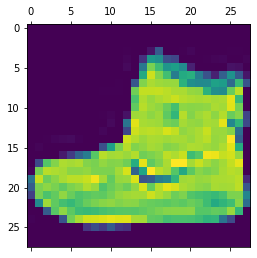

In [10]:
plt.matshow(x_train[0])

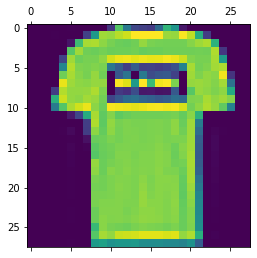

In [12]:
plt.matshow(x_train[1])

In [13]:
# now we need to start our neural network training

In [14]:
# but before that, we shall NORMALIZE:

In [22]:
x_train = x_train/255
x_test = x_test/255

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten


In [25]:
model = Sequential()

In [18]:
# now we add layers to our model

In [26]:
model.add(Flatten(input_shape=[28,28]))       # flatten converts 2D array to 1D
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
Total params: 16,120
Trainable params: 16,120
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [29]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.5986 - accuracy: 0.7968
Epoch 2/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.4442 - accuracy: 0.8458
Epoch 3/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.4179 - accuracy: 0.8535
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.4002 - accuracy: 0.8596
Epoch 5/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.3863 - accuracy: 0.8642


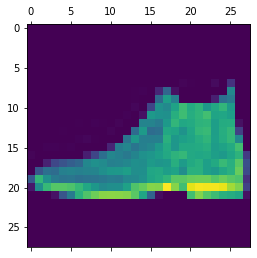

In [30]:
plt.matshow(x_test[0])

In [31]:
yp = model.predict(x_test)

In [32]:
yp[0]

# this returns probability list

array([2.4789837e-05, 7.3474482e-08, 3.2215208e-05, 3.1468491e-05,
       2.6988630e-05, 5.3383581e-02, 1.5074418e-05, 9.9136196e-02,
       2.0548333e-03, 8.4529400e-01, 6.3332678e-08, 8.3524064e-12,
       1.2697944e-10, 4.4397298e-12, 1.2183303e-09, 6.1559280e-07,
       3.5392830e-12, 9.1044186e-12, 1.4443381e-09, 9.0535862e-10],
      dtype=float32)

In [33]:
np.argmax(yp[0])

9

In [34]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 16us/step


[0.4387962333202362, 0.8410000205039978]

In [35]:
# evaluate gives that it has 84 % accuracy score

In [36]:
# we can try increasing the number of neurons for better accuracy:

In [37]:
model = Sequential()

model.add(Flatten(input_shape=[28,28]))       
model.add(Dense(300, activation='relu'))          # made it 300 now
model.add(Dense(20, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.4840 - accuracy: 0.8284
Epoch 2/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.3627 - accuracy: 0.8681
Epoch 3/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.3259 - accuracy: 0.8799
Epoch 4/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.3041 - accuracy: 0.8878
Epoch 5/5
10000/10000 [==============================] - 0s 28us/step


[0.37184609907865523, 0.8597000241279602]

In [38]:
# now accuracy became 85.9 %

# Exercise

In [48]:
import pandas as pd
import numpy as np

from keras.datasets import mnist

In [49]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [50]:
x_train.shape

(60000, 28, 28)

In [51]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [52]:
import matplotlib.pyplot as plt

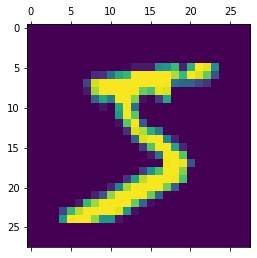

In [53]:
plt.matshow(x_train[0])

In [54]:
y_train[0]

5

In [55]:
x_train = x_train/255
x_test = x_test/255

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten


In [61]:
model = Sequential()

In [31]:
model.add(Flatten(input_shape=[28,28]))       # flatten converts 2D array to 1D
model.add(Dense(200, activation='relu'))
model.add(Dense(20, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_4 (Dense)              (None, 20)                4020      
Total params: 161,020
Trainable params: 161,020
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.2481 - accuracy: 0.9296
Epoch 2/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.1045 - accuracy: 0.9693
Epoch 3/5
60000/60000 [==============================] - 11s 182us/step - loss: 0.0700 - accuracy: 0.9794
Epoch 4/5
60000/60000 [==============================] - 8s 138us/step - loss: 0.0515 - accuracy: 0.9838
Epoch 5/5
60000/60000 [==============================] - 8s 128us/step - loss: 0.0393 - accuracy: 0.9875


In [34]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 27us/step


[0.07458834365855437, 0.9764999747276306]